<a href="https://colab.research.google.com/github/R-A-N-N/Final-Year-Project/blob/main/Twitter_Problem_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Authentication

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import tweepy as tw
from time import sleep
import pandas as pd
import csv
import re 
import string

In [3]:
consumer_key= 'qc8vFuKFgGzcoxbhAkREHxRoE'
consumer_secret= 'ui2u5ZnJYLPtBrTNMreRGIeRZBLwGoF1W9XPmdYvSVofWg6o6A'
access_token= '1429353996188196876-CBoTpX136goMmypFtgTk2WO4sqH0ZC'
access_token_secret= '2ETqV9DxxdlVqMEEDw9A9kbY2Dy4L4rtlOlpuAoVYuEXl'

#please copy paste all the keys which are pinned on our discord server in back-end channel 

In [4]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

#Method 1 - Extraction

In [ ]:
csvFile = open('/content/drive/MyDrive/Twitter Problem Detection/Tweets_methodExtraction1.csv', 'a')
csvWriter = csv.writer(csvFile)

# Define the search term and the date_since date as variables
file = csv.reader(open('/content/drive/MyDrive/Twitter Problem Detection/GeoNames.csv'), delimiter=',')

for line in file:
    # print(line)
    str1 = ""
    for ele in line: 
        str1 += ele
    str1 + ", Thane"
    search_words = str1
    # print(search_words)
    date_since = "2000-01-01"
    # Collect tweets
    tweets = tw.Cursor(api.search,
                  q=search_words,
                  lang="en",
                  since=date_since , count= 1 ,tweet_mode="extended").items()
    tweets
    # Iterate and print tweets
    for tweet in tweets:
      csvWriter.writerow([tweet.created_at, tweet.full_text ,tweet.user.screen_name , tweet.user.location])
      print(tweet.full_text)



Rashtriya POSHAN Maah-2021 HBYC visits by ASHA worker Savitri, Sarita and Anu in "C" and "D" Block, New Ashok Nagar, East District https://t.co/8o64HeFN0P
@mvvnllesatrans @MVVNLHQ @UPPCLLKO @mduppcl @UppclChairman 14/1003, Sector 14, Indira Nagar, Lucknow, Uttar Pradesh 226016

New power house sector 14 indira nagar
@UPPCLLKO @MVVNLHQ hi, its been more than 7 hours thesre is no power supply in my area sector 16 indira nagar lucknow, new power house, i called customer care but thry cant update as their system is down since long...who can help
RT @pfws1: @PfwsPresident Smt. Anu Asthana, accompanied by senior functionaries, visited Malviya Nagar police colony where she was welcomed…
RT @rajshekharTOI: Terror operative Osama from Jamia Nagar arrested by Delhi Police special cell. https://t.co/3FrtVn3WWa
RT @pfws1: @PfwsPresident Smt. Anu Asthana, accompanied by senior functionaries, visited Malviya Nagar police colony where she was welcomed…
RT @sioindia: @SioTamilnadu's Sports Wing, Track

#TRIAL - AMS

In [ ]:
csvFile = open('TweetsAms.csv', 'a')
csvWriter = csv.writer(csvFile)


file = csv.reader(open('/content/drive/MyDrive/GeoNames.csv'), delimiter=',')
for line in file:
    # print(line)
    str1 = ""
    for ele in line: 
        str1 += ele
    str1 + " , Thane"
    # print(str1)
    search_words = str1      #enter your words
    new_search = search_words + " -filter:retweets"
    for tweet in tw.Cursor(api.search,q=new_search,count=100,
                           lang="en",
                           since_id=0).items():
      csvWriter.writerow([tweet.created_at, tweet.text,tweet.user.screen_name.encode('utf-8'), tweet.user.location.encode('utf-8')])
      print(tweet.text)

Streaming output truncated to the last 5000 lines.
@FeelFreeToPanic The pointing to the ear then the finger to mouth (shhh)  hahaha I don't think he was intentionally… https://t.co/5UMhBPJZ33
ON Diva Funk : Switch - What A Feeling https://t.co/OBdDNsaR4a #NOWPLAYING #FUNK #RADIO #WEB
@RealDuttyMan @ThisisPreki @TwiddersGad Witness mi a look 🤣
@MrMeguairs @DrCEWilson @thatgirlbamz @wise_diva You weirdos never heard of these things called friends?
@kizi_DIVA @browningbae @sonofportie @themohwgovjm To stop them from annoying the rest of us . 😆
@jayjaybrown97 @browningbae @sonofportie @themohwgovjm I don't think any explanation necessary why ppl must be spoon fed every time 🤔
╭🔅╮╭🔅╮╭🔅╮╭🔅╮╭🔅╮   
💜 P U R P L E   P E R F E C T I O N 💜
╰🔅╯╰🔅╯╰🔅╯╰🔅╯╰🔅╯ 
#PurplePerfection 💜 https://t.co/EBbR4vXS95
Project Diva f ♥
➺ 'Whistle' 
designer: 7:24 https://t.co/QDsucDBtG5
╭🔅╮╭🔅╮╭🔅╮╭🔅╮╭🔅╮   
💜 P U R P L E   P E R F E C T I O N 💜
╰🔅╯╰🔅╯╰🔅╯╰🔅╯╰🔅╯ 
#PurplePerfection 💜 https://t.co/XAj3L9rojW
╭🔅╮╭🔅╮╭🔅╮╭🔅╮╭🔅

#Data cleaning 


In [5]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
%matplotlib inline

In [6]:
# Load dataset
def load_data():
    data = pd.read_csv('/content/drive/MyDrive/Twitter Problem Detection/training_dataset.csv')
    return data

# convert to dataframe
df = load_data()
df.head()

,Tweets,Output
0,Rashtriya POSHAN Maah-2021 HBYC visits by ASHA...,0
1,@mvvnllesatrans @MVVNLHQ @UPPCLLKO @mduppcl @U...,0
2,"@UPPCLLKO @MVVNLHQ hi, its been more than 7 ho...",1
3,"RT @pfws1: @PfwsPresident Smt. Anu Asthana, ac...",0
4,RT @rajshekharTOI: Terror operative Osama from...,0


In [9]:
# remove links
df['Tweets'] = df['Tweets'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

# remove emoji
df2 = df.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

df2['Tweets'] = df2['Tweets'].str.replace('(@\w+.*?)',"")
df2['Tweets'] = df2['Tweets'].str.replace('(#\w+.*?)',"")

# print df
pd.set_option("display.max_colwidth", -1)
pd.set_option('display.max_rows', df2.shape[0]+1)
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  # This is added back by InteractiveShellApp.init_path()


,Tweets,Output
0,"Rashtriya POSHAN Maah-2021 HBYC visits by ASHA worker Savitri, Sarita and Anu in ""C"" and ""D"" Block, New Ashok Nagar, East District",0
1,"14/1003, Sector 14, Indira Nagar, Lucknow, Uttar Pradesh 226016 New power house sector 14 indira nagar",0
2,"hi, its been more than 7 hours thesre is no power supply in my area sector 16 indira nagar lucknow, new power house, i called customer care but thry cant update as their system is down since long...who can help",1
3,"RT : Smt. Anu Asthana, accompanied by senior functionaries, visited Malviya Nagar police colony where she was welcomed",0
4,RT : Terror operative Osama from Jamia Nagar arrested by Delhi Police special cell.,0
5,"RT : Smt. Anu Asthana, accompanied by senior functionaries, visited Malviya Nagar police colony where she was welcomed",0
6,"RT : 's Sports Wing, Track Force Sports Club inaugurated a playground for badminton, cricket practice field and physi",0
7,\nThis area is Azad Nagar Colaba Market please I request bmc to take urgent action on our area can't able to walk properly. Cleaning also pls take action nobody comes to clean our area.,1
8,"RT : 's Sports Wing, Track Force Sports Club inaugurated a playground for badminton, cricket practice field and physi",0
9,"'s Sports Wing, Track Force Sports Club inaugurated a playground for badminton, cricket practice field and physical workout in the Azad Nagar area of Coimbatore. Read full report -",0


##Droping Duplicate values 

In [10]:
df2.drop_duplicates(subset ="Tweets",
                     keep = False, inplace = True)
df2

,Tweets,Output
0,"Rashtriya POSHAN Maah-2021 HBYC visits by ASHA worker Savitri, Sarita and Anu in ""C"" and ""D"" Block, New Ashok Nagar, East District",0
1,"14/1003, Sector 14, Indira Nagar, Lucknow, Uttar Pradesh 226016 New power house sector 14 indira nagar",0
2,"hi, its been more than 7 hours thesre is no power supply in my area sector 16 indira nagar lucknow, new power house, i called customer care but thry cant update as their system is down since long...who can help",1
4,RT : Terror operative Osama from Jamia Nagar arrested by Delhi Police special cell.,0
7,\nThis area is Azad Nagar Colaba Market please I request bmc to take urgent action on our area can't able to walk properly. Cleaning also pls take action nobody comes to clean our area.,1
9,"'s Sports Wing, Track Force Sports Club inaugurated a playground for badminton, cricket practice field and physical workout in the Azad Nagar area of Coimbatore. Read full report -",0
10,The water supply in some areas will remain suspended from 9am on September 22 to 9am on September 23.,1
11,Movers and packers in Thane | Packers and movers in Thane | Packers and movers Thane | Movers and packers Thane,0
12,MH SH 35 to Balkum. Pls do the road repairs.Aaple Sarkar Dept/PWOD/2021/16019,1
13,"R/Sir, As per report of Thane Division, It is requested to kindly visit Balkum PO for your respective transaction.",0


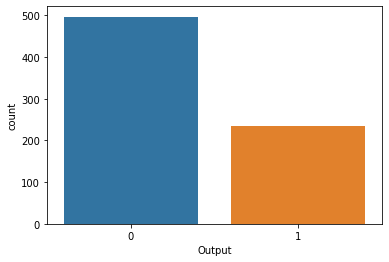

In [11]:
sns.countplot(x = 'Output', data = df2)

##Wordcloud Visualization

In [12]:
df2['Output'] = df2['Output'].astype(str).astype(int)
df2.dtypes




Tweets    object
Output    int64 
dtype: object

In [13]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
# Start with one review:
df_Related = df2[df2['Output']==1]
df_notRelated = df2[df2['Output']==0]
tweet_All = " ".join(review for review in df2.Tweets)
tweet_Realted = " ".join(review for review in df_Related.Tweets)
tweet_notRelated = " ".join(review for review in df_notRelated.Tweets)

# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(tweet_All)
wordcloud_Realted = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(tweet_Realted)
wordcloud_notRelated = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(tweet_notRelated)



(-0.5, 399.5, 199.5, -0.5)

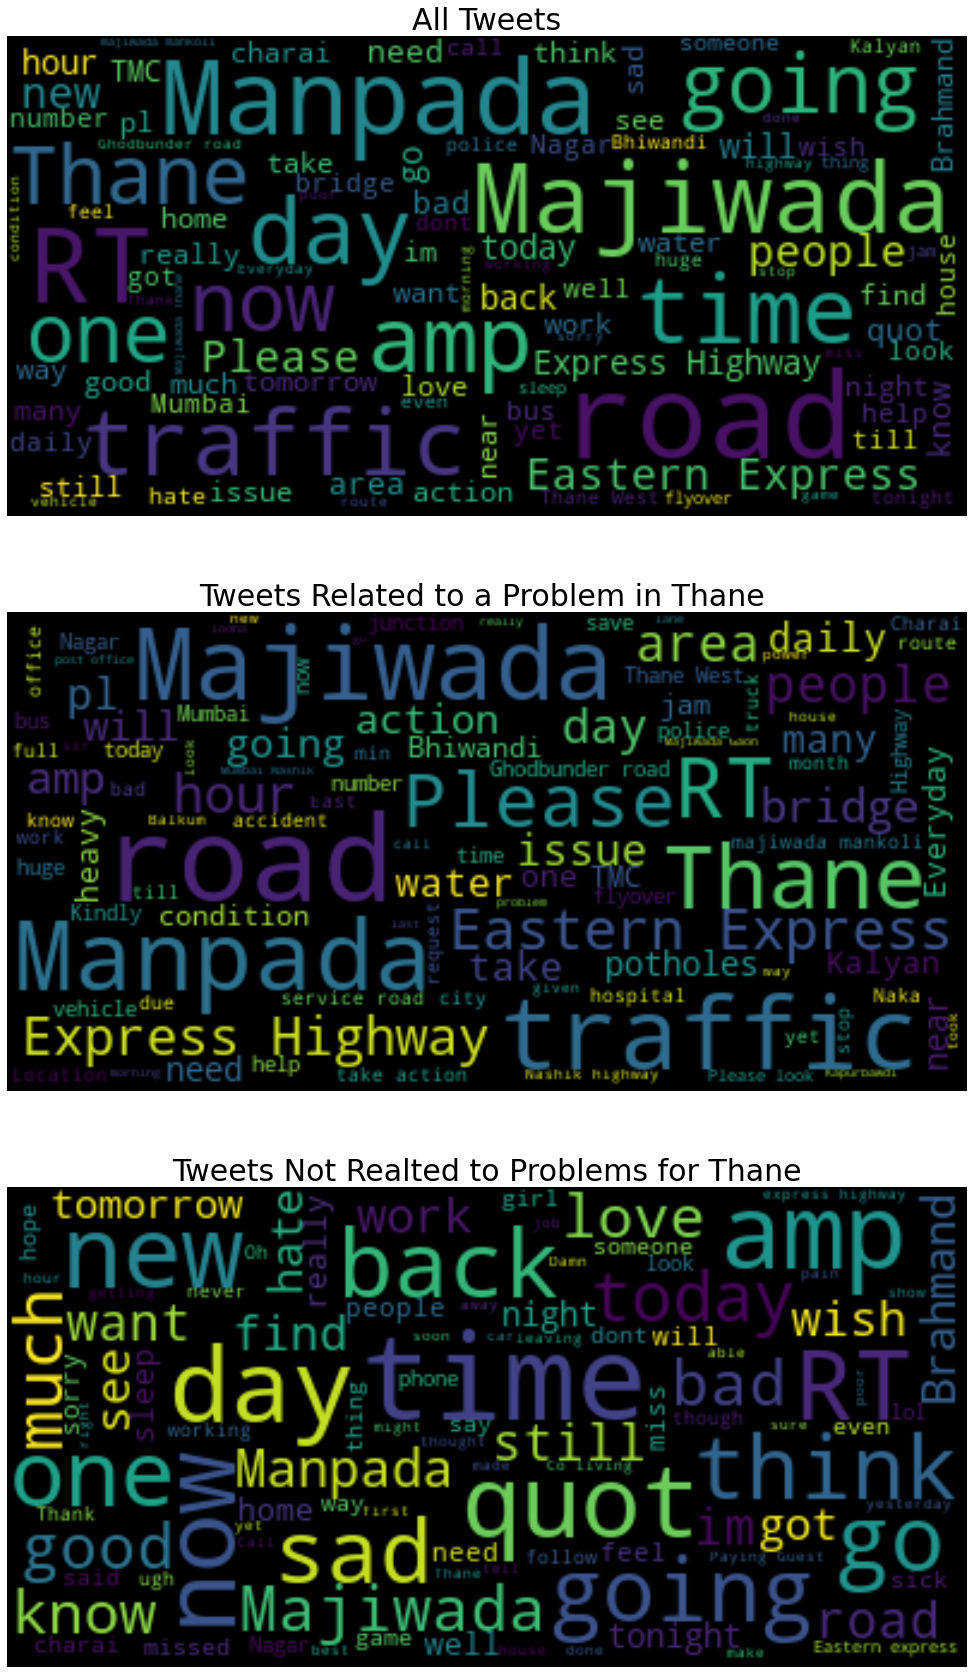

In [14]:

fig, ax = plt.subplots(3, 1, figsize  = (30,30))
# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_Realted, interpolation='bilinear')
ax[1].set_title('Tweets Related to a Problem in Thane ',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_notRelated, interpolation='bilinear')
ax[2].set_title('Tweets Not Realted to Problems for Thane',fontsize=30)
ax[2].axis('off')

## Observation 

1. 
2. 


#Pre-processing text data

1. Remove punctuations
2. Tokenization - Converting a sentence into list of words
3. Remove stopwords
4. Lammetization/stemming - Tranforming any form of a word to its root word


In [15]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df2['Tweet_punct'] = df2['Tweets'].apply(lambda x: remove_punct(x))
df2.head(10)

,Tweets,Output,Tweet_punct
0,"Rashtriya POSHAN Maah-2021 HBYC visits by ASHA worker Savitri, Sarita and Anu in ""C"" and ""D"" Block, New Ashok Nagar, East District",0,Rashtriya POSHAN Maah HBYC visits by ASHA worker Savitri Sarita and Anu in C and D Block New Ashok Nagar East District
1,"14/1003, Sector 14, Indira Nagar, Lucknow, Uttar Pradesh 226016 New power house sector 14 indira nagar",0,Sector Indira Nagar Lucknow Uttar Pradesh New power house sector indira nagar
2,"hi, its been more than 7 hours thesre is no power supply in my area sector 16 indira nagar lucknow, new power house, i called customer care but thry cant update as their system is down since long...who can help",1,hi its been more than hours thesre is no power supply in my area sector indira nagar lucknow new power house i called customer care but thry cant update as their system is down since longwho can help
4,RT : Terror operative Osama from Jamia Nagar arrested by Delhi Police special cell.,0,RT Terror operative Osama from Jamia Nagar arrested by Delhi Police special cell
7,\nThis area is Azad Nagar Colaba Market please I request bmc to take urgent action on our area can't able to walk properly. Cleaning also pls take action nobody comes to clean our area.,1,\nThis area is Azad Nagar Colaba Market please I request bmc to take urgent action on our area cant able to walk properly Cleaning also pls take action nobody comes to clean our area
9,"'s Sports Wing, Track Force Sports Club inaugurated a playground for badminton, cricket practice field and physical workout in the Azad Nagar area of Coimbatore. Read full report -",0,s Sports Wing Track Force Sports Club inaugurated a playground for badminton cricket practice field and physical workout in the Azad Nagar area of Coimbatore Read full report
10,The water supply in some areas will remain suspended from 9am on September 22 to 9am on September 23.,1,The water supply in some areas will remain suspended from am on September to am on September
11,Movers and packers in Thane | Packers and movers in Thane | Packers and movers Thane | Movers and packers Thane,0,Movers and packers in Thane Packers and movers in Thane Packers and movers Thane Movers and packers Thane
12,MH SH 35 to Balkum. Pls do the road repairs.Aaple Sarkar Dept/PWOD/2021/16019,1,MH SH to Balkum Pls do the road repairsAaple Sarkar DeptPWOD
13,"R/Sir, As per report of Thane Division, It is requested to kindly visit Balkum PO for your respective transaction.",0,RSir As per report of Thane Division It is requested to kindly visit Balkum PO for your respective transaction


In [17]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

df2['Tweet_tokenized'] = df2['Tweet_punct'].apply(lambda x: tokenization(x.lower()))
df2.head()

,Tweets,Output,Tweet_punct,Tweet_tokenized
0,"Rashtriya POSHAN Maah-2021 HBYC visits by ASHA worker Savitri, Sarita and Anu in ""C"" and ""D"" Block, New Ashok Nagar, East District",0,Rashtriya POSHAN Maah HBYC visits by ASHA worker Savitri Sarita and Anu in C and D Block New Ashok Nagar East District,"[rashtriya, poshan, maah, hbyc, visits, by, asha, worker, savitri, sarita, and, anu, in, c, and, d, block, new, ashok, nagar, east, district, ]"
1,"14/1003, Sector 14, Indira Nagar, Lucknow, Uttar Pradesh 226016 New power house sector 14 indira nagar",0,Sector Indira Nagar Lucknow Uttar Pradesh New power house sector indira nagar,"[, sector, indira, nagar, lucknow, uttar, pradesh, new, power, house, sector, indira, nagar]"
2,"hi, its been more than 7 hours thesre is no power supply in my area sector 16 indira nagar lucknow, new power house, i called customer care but thry cant update as their system is down since long...who can help",1,hi its been more than hours thesre is no power supply in my area sector indira nagar lucknow new power house i called customer care but thry cant update as their system is down since longwho can help,"[, hi, its, been, more, than, hours, thesre, is, no, power, supply, in, my, area, sector, indira, nagar, lucknow, new, power, house, i, called, customer, care, but, thry, cant, update, as, their, system, is, down, since, longwho, can, help]"
4,RT : Terror operative Osama from Jamia Nagar arrested by Delhi Police special cell.,0,RT Terror operative Osama from Jamia Nagar arrested by Delhi Police special cell,"[rt, terror, operative, osama, from, jamia, nagar, arrested, by, delhi, police, special, cell, ]"
7,\nThis area is Azad Nagar Colaba Market please I request bmc to take urgent action on our area can't able to walk properly. Cleaning also pls take action nobody comes to clean our area.,1,\nThis area is Azad Nagar Colaba Market please I request bmc to take urgent action on our area cant able to walk properly Cleaning also pls take action nobody comes to clean our area,"[, this, area, is, azad, nagar, colaba, market, please, i, request, bmc, to, take, urgent, action, on, our, area, cant, able, to, walk, properly, cleaning, also, pls, take, action, nobody, comes, to, clean, our, area, ]"


In [18]:
import nltk
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df2['Tweet_nostopwords'] = df2['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
df2.head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Tweets,Output,Tweet_punct,Tweet_tokenized,Tweet_nostopwords
0,"Rashtriya POSHAN Maah-2021 HBYC visits by ASHA worker Savitri, Sarita and Anu in ""C"" and ""D"" Block, New Ashok Nagar, East District",0,Rashtriya POSHAN Maah HBYC visits by ASHA worker Savitri Sarita and Anu in C and D Block New Ashok Nagar East District,"[rashtriya, poshan, maah, hbyc, visits, by, asha, worker, savitri, sarita, and, anu, in, c, and, d, block, new, ashok, nagar, east, district, ]","[rashtriya, poshan, maah, hbyc, visits, asha, worker, savitri, sarita, anu, c, block, new, ashok, nagar, east, district, ]"
1,"14/1003, Sector 14, Indira Nagar, Lucknow, Uttar Pradesh 226016 New power house sector 14 indira nagar",0,Sector Indira Nagar Lucknow Uttar Pradesh New power house sector indira nagar,"[, sector, indira, nagar, lucknow, uttar, pradesh, new, power, house, sector, indira, nagar]","[, sector, indira, nagar, lucknow, uttar, pradesh, new, power, house, sector, indira, nagar]"
2,"hi, its been more than 7 hours thesre is no power supply in my area sector 16 indira nagar lucknow, new power house, i called customer care but thry cant update as their system is down since long...who can help",1,hi its been more than hours thesre is no power supply in my area sector indira nagar lucknow new power house i called customer care but thry cant update as their system is down since longwho can help,"[, hi, its, been, more, than, hours, thesre, is, no, power, supply, in, my, area, sector, indira, nagar, lucknow, new, power, house, i, called, customer, care, but, thry, cant, update, as, their, system, is, down, since, longwho, can, help]","[, hi, hours, thesre, power, supply, area, sector, indira, nagar, lucknow, new, power, house, called, customer, care, thry, cant, update, system, since, longwho, help]"
4,RT : Terror operative Osama from Jamia Nagar arrested by Delhi Police special cell.,0,RT Terror operative Osama from Jamia Nagar arrested by Delhi Police special cell,"[rt, terror, operative, osama, from, jamia, nagar, arrested, by, delhi, police, special, cell, ]","[rt, terror, operative, osama, jamia, nagar, arrested, delhi, police, special, cell, ]"
7,\nThis area is Azad Nagar Colaba Market please I request bmc to take urgent action on our area can't able to walk properly. Cleaning also pls take action nobody comes to clean our area.,1,\nThis area is Azad Nagar Colaba Market please I request bmc to take urgent action on our area cant able to walk properly Cleaning also pls take action nobody comes to clean our area,"[, this, area, is, azad, nagar, colaba, market, please, i, request, bmc, to, take, urgent, action, on, our, area, cant, able, to, walk, properly, cleaning, also, pls, take, action, nobody, comes, to, clean, our, area, ]","[, area, azad, nagar, colaba, market, please, request, bmc, take, urgent, action, area, cant, able, walk, properly, cleaning, also, pls, take, action, nobody, comes, clean, area, ]"
9,"'s Sports Wing, Track Force Sports Club inaugurated a playground for badminton, cricket practice field and physical workout in the Azad Nagar area of Coimbatore. Read full report -",0,s Sports Wing Track Force Sports Club inaugurated a playground for badminton cricket practice field and physical workout in the Azad Nagar area of Coimbatore Read full report,"[s, sports, wing, track, force, sports, club, inaugurated, a, playground, for, badminton, cricket, practice, field, and, physical, workout, in, the, azad, nagar, area, of, coimbatore, read, full, report, ]","[sports, wing, track, force, sports, club, inaugurated, playground, badminton, cricket, practice, field, physical, workout, azad, nagar, area, coimbatore, read, full, report, ]"
10,The water supply in some areas will remain suspended from 9am on September 22 to 9am on September 23.,1,The water supply in some areas will remain suspended from am on September to am on September,"[the, water, supply, in, some, areas, will, remain, suspended, from, am, on, september, to, am, on, september, ]","[

## Stemming and Lammitization
Ex - developed, development

Stemming and Lemmatization helps us to achieve the root forms (sometimes called synonyms in search context) of inflected (derived) words. Stemming is different to Lemmatization in the approach it uses to produce root forms of words and the word produced.

In [19]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

df2['Tweet_stemmed'] = df2['Tweet_nostopwords'].apply(lambda x: stemming(x))
df2.head()

,Tweets,Output,Tweet_punct,Tweet_tokenized,Tweet_nostopwords,Tweet_stemmed
0,"Rashtriya POSHAN Maah-2021 HBYC visits by ASHA worker Savitri, Sarita and Anu in ""C"" and ""D"" Block, New Ashok Nagar, East District",0,Rashtriya POSHAN Maah HBYC visits by ASHA worker Savitri Sarita and Anu in C and D Block New Ashok Nagar East District,"[rashtriya, poshan, maah, hbyc, visits, by, asha, worker, savitri, sarita, and, anu, in, c, and, d, block, new, ashok, nagar, east, district, ]","[rashtriya, poshan, maah, hbyc, visits, asha, worker, savitri, sarita, anu, c, block, new, ashok, nagar, east, district, ]","[rashtriya, poshan, maah, hbyc, visit, asha, worker, savitri, sarita, anu, c, block, new, ashok, nagar, east, district, ]"
1,"14/1003, Sector 14, Indira Nagar, Lucknow, Uttar Pradesh 226016 New power house sector 14 indira nagar",0,Sector Indira Nagar Lucknow Uttar Pradesh New power house sector indira nagar,"[, sector, indira, nagar, lucknow, uttar, pradesh, new, power, house, sector, indira, nagar]","[, sector, indira, nagar, lucknow, uttar, pradesh, new, power, house, sector, indira, nagar]","[, sector, indira, nagar, lucknow, uttar, pradesh, new, power, hous, sector, indira, nagar]"
2,"hi, its been more than 7 hours thesre is no power supply in my area sector 16 indira nagar lucknow, new power house, i called customer care but thry cant update as their system is down since long...who can help",1,hi its been more than hours thesre is no power supply in my area sector indira nagar lucknow new power house i called customer care but thry cant update as their system is down since longwho can help,"[, hi, its, been, more, than, hours, thesre, is, no, power, supply, in, my, area, sector, indira, nagar, lucknow, new, power, house, i, called, customer, care, but, thry, cant, update, as, their, system, is, down, since, longwho, can, help]","[, hi, hours, thesre, power, supply, area, sector, indira, nagar, lucknow, new, power, house, called, customer, care, thry, cant, update, system, since, longwho, help]","[, hi, hour, thesr, power, suppli, area, sector, indira, nagar, lucknow, new, power, hous, call, custom, care, thri, cant, updat, system, sinc, longwho, help]"
4,RT : Terror operative Osama from Jamia Nagar arrested by Delhi Police special cell.,0,RT Terror operative Osama from Jamia Nagar arrested by Delhi Police special cell,"[rt, terror, operative, osama, from, jamia, nagar, arrested, by, delhi, police, special, cell, ]","[rt, terror, operative, osama, jamia, nagar, arrested, delhi, police, special, cell, ]","[rt, terror, oper, osama, jamia, nagar, arrest, delhi, polic, special, cell, ]"
7,\nThis area is Azad Nagar Colaba Market please I request bmc to take urgent action on our area can't able to walk properly. Cleaning also pls take action nobody comes to clean our area.,1,\nThis area is Azad Nagar Colaba Market please I request bmc to take urgent action on our area cant able to walk properly Cleaning also pls take action nobody comes to clean our area,"[, this, area, is, azad, nagar, colaba, market, please, i, request, bmc, to, take, urgent, action, on, our, area, cant, able, to, walk, properly, cleaning, also, pls, take, action, nobody, comes, to, clean, our, area, ]","[, area, azad, nagar, colaba, market, please, request, bmc, take, urgent, action, area, cant, able, walk, properly, cleaning, also, pls, take, action, nobody, comes, clean, area, ]","[, area, azad, nagar, colaba, market, pleas, request, bmc, take, urgent, action, area, cant, abl, walk, properli, clean, also, pl, take, action, nobodi, come, clean, area, ]"


In [20]:
import nltk
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df2['Tweet_lemmatized'] = df2['Tweet_nostopwords'].apply(lambda x: lemmatizer(x))
df2.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,Tweets,Output,Tweet_punct,Tweet_tokenized,Tweet_nostopwords,Tweet_stemmed,Tweet_lemmatized
0,"Rashtriya POSHAN Maah-2021 HBYC visits by ASHA worker Savitri, Sarita and Anu in ""C"" and ""D"" Block, New Ashok Nagar, East District",0,Rashtriya POSHAN Maah HBYC visits by ASHA worker Savitri Sarita and Anu in C and D Block New Ashok Nagar East District,"[rashtriya, poshan, maah, hbyc, visits, by, asha, worker, savitri, sarita, and, anu, in, c, and, d, block, new, ashok, nagar, east, district, ]","[rashtriya, poshan, maah, hbyc, visits, asha, worker, savitri, sarita, anu, c, block, new, ashok, nagar, east, district, ]","[rashtriya, poshan, maah, hbyc, visit, asha, worker, savitri, sarita, anu, c, block, new, ashok, nagar, east, district, ]","[rashtriya, poshan, maah, hbyc, visit, asha, worker, savitri, sarita, anu, c, block, new, ashok, nagar, east, district, ]"
1,"14/1003, Sector 14, Indira Nagar, Lucknow, Uttar Pradesh 226016 New power house sector 14 indira nagar",0,Sector Indira Nagar Lucknow Uttar Pradesh New power house sector indira nagar,"[, sector, indira, nagar, lucknow, uttar, pradesh, new, power, house, sector, indira, nagar]","[, sector, indira, nagar, lucknow, uttar, pradesh, new, power, house, sector, indira, nagar]","[, sector, indira, nagar, lucknow, uttar, pradesh, new, power, hous, sector, indira, nagar]","[, sector, indira, nagar, lucknow, uttar, pradesh, new, power, house, sector, indira, nagar]"
2,"hi, its been more than 7 hours thesre is no power supply in my area sector 16 indira nagar lucknow, new power house, i called customer care but thry cant update as their system is down since long...who can help",1,hi its been more than hours thesre is no power supply in my area sector indira nagar lucknow new power house i called customer care but thry cant update as their system is down since longwho can help,"[, hi, its, been, more, than, hours, thesre, is, no, power, supply, in, my, area, sector, indira, nagar, lucknow, new, power, house, i, called, customer, care, but, thry, cant, update, as, their, system, is, down, since, longwho, can, help]","[, hi, hours, thesre, power, supply, area, sector, indira, nagar, lucknow, new, power, house, called, customer, care, thry, cant, update, system, since, longwho, help]","[, hi, hour, thesr, power, suppli, area, sector, indira, nagar, lucknow, new, power, hous, call, custom, care, thri, cant, updat, system, sinc, longwho, help]","[, hi, hour, thesre, power, supply, area, sector, indira, nagar, lucknow, new, power, house, called, customer, care, thry, cant, update, system, since, longwho, help]"
4,RT : Terror operative Osama from Jamia Nagar arrested by Delhi Police special cell.,0,RT Terror operative Osama from Jamia Nagar arrested by Delhi Police special cell,"[rt, terror, operative, osama, from, jamia, nagar, arrested, by, delhi, police, special, cell, ]","[rt, terror, operative, osama, jamia, nagar, arrested, delhi, police, special, cell, ]","[rt, terror, oper, osama, jamia, nagar, arrest, delhi, polic, special, cell, ]","[rt, terror, operative, osama, jamia, nagar, arrested, delhi, police, special, cell, ]"
7,\nThis area is Azad Nagar Colaba Market please I request bmc to take urgent action on our area can't able to walk properly. Cleaning also pls take action nobody comes to clean our area.,1,\nThis area is Azad Nagar Colaba Market please I request bmc to take urgent action on our area cant able to walk properly Cleaning also pls take action nobody comes to clean our area,"[, this, area, is, azad, nagar, colaba, market, please, i, request, bmc, to, take, urgent, action, on, our, area, cant, able, to, walk, properly, cleaning, also, pls, take, action, nobody, comes, to, clean, our, area, ]","[, area, azad, nagar, colaba, market, please, request, bmc, take, urgent, action, area, cant, able, walk, properly, cleaning, also, pls, take, action, nobody, comes, clean, area, ]","[, area, azad, nagar, colaba, market, pleas, request, bmc, take, urgent, action, area, cant, abl,

## Vectorisation


Cleaning data in single line through passing clean_text in the CountVectorizer

In [21]:
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [22]:
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(df2['Tweets'])
print('{} Number of tweets has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

732 Number of tweets has 2699 words


In [23]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,aaaaand,aadhar,aamn,aamp,aap,aapk,aaron,aata,aaw,ab,abl,absenc,absent,absolut,abt,abund,ac,academi,accept,access,accid,accident,accommod,accompani,accord,account,accumul,accus,ach,across,act,action,activ,actual,ad,add,addit,address,addresse,...,wpl,wrench,write,writerampreview,written,wrong,wudnt,wutcha,x,xd,xm,xxx,ya,yabu,yall,yawwwnn,yay,ye,yeah,year,yearold,yer,yesterday,yet,yin,yk,yoga,york,youd,your,youtub,yoyoyo,yr,yummi,yup,yuto,zero,zip,zoe,zombi
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##Trial Nidhi-Rakshita

In [24]:
# split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2['Tweets'], df2['Output'], random_state=1)
print('Number of rows in the total set: {}'.format(df2.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 732
Number of rows in the training set: 549
Number of rows in the test set: 183


In [25]:
# Instantiate the CountVectorizer method
count_vector = CountVectorizer()
# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)
# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test)

In [26]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [27]:
predictions = naive_bayes.predict(testing_data)
print(predictions)

[0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1
 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1
 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1
 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0]


In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test, predictions)))
print('Recall score: ', format(recall_score(y_test, predictions)))
print('F1 score: ', format(f1_score(y_test, predictions)))

Accuracy score:  0.8743169398907104
Precision score:  0.7391304347826086
Recall score:  0.9107142857142857
F1 score:  0.8159999999999998


In [33]:
lst = [['Traffic is crazy'],['Going out today'],['What is wrong with the wi-fi in this locality'],['Party..yayay'],['Life is unfair'],['Hospitals running low on staff'],['Children going to school'],['Cant sleep']]
df = pd.Series( (v[0] for v in lst) )

trial = count_vector.transform(df)

prediction_trial = naive_bayes.predict(trial)
print(prediction_trial)

[1 0 1 0 0 1 0 0]
